In [1]:
import numpy as np

import torch
from toolkit.dataloader import DrugMANDataset
from DrugMAN.trainer import Trainer
from toolkit.saver import ResultSaver
from toolkit.plotter import plot_losses, plot_roc_curve, plot_pr_curve


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
dataFolder = 'data/warm_start'
embFolder = 'data/bionic_embed'
dataset = DrugMANDataset(dataFolder, embFolder)
df_train, df_val, df_test = dataset.load_data()
train_dataloader, val_dataloader, test_dataloader, test_bcs = dataset.get_dataloader()

In [3]:
 # start train
drugman_trainer = Trainer(test_bcs, train_dataloader, val_dataloader, test_dataloader, device)
train_list, val_list, test_list, test_pred, best_model = drugman_trainer.train()

Epoch 1
train_loss: 0.69382680
val_AUROC: 0.4866, val_AUPRC: 0.4885, val_loss: 0.6936, times: 1.6395
Epoch 2
train_loss: 0.69369193
val_AUROC: 0.4972, val_AUPRC: 0.4979, val_loss: 0.6934, times: 1.4498
Epoch 3
train_loss: 0.69355304
val_AUROC: 0.5191, val_AUPRC: 0.5173, val_loss: 0.6929, times: 1.3989
Epoch 4
train_loss: 0.69310222
val_AUROC: 0.5519, val_AUPRC: 0.5456, val_loss: 0.6922, times: 1.5835
Epoch 5
train_loss: 0.69280359
val_AUROC: 0.5873, val_AUPRC: 0.5841, val_loss: 0.6913, times: 1.4398
Epoch 6
train_loss: 0.69206200
val_AUROC: 0.6216, val_AUPRC: 0.6279, val_loss: 0.6903, times: 1.5349
Epoch 7
train_loss: 0.69137931
val_AUROC: 0.6513, val_AUPRC: 0.6666, val_loss: 0.6890, times: 1.4349
Epoch 8
train_loss: 0.69029365
val_AUROC: 0.6751, val_AUPRC: 0.6986, val_loss: 0.6873, times: 1.4372
Epoch 9
train_loss: 0.68908619
val_AUROC: 0.6905, val_AUPRC: 0.7172, val_loss: 0.6851, times: 1.4449
Epoch 10
train_loss: 0.68675597
val_AUROC: 0.7022, val_AUPRC: 0.7310, val_loss: 0.6817, tim

In [4]:
# result
test_pred = np.array(test_pred)
test_data = np.array(df_test)
pred = np.concatenate((test_data, test_pred), axis=1)
y_true = np.array(pred[:, 2]).astype(int)
y_score = np.array(pred[:, 3])

In [5]:
# save result
save_fileFoder = "result"  # 结果保存路径
saver = ResultSaver(save_fileFoder)
saver.save_model(best_model)    # 模型保存
saver.save_train_result(train_list)
saver.save_val_result(val_list)
saver.save_test_result(test_list)
saver.save_pred(pred)

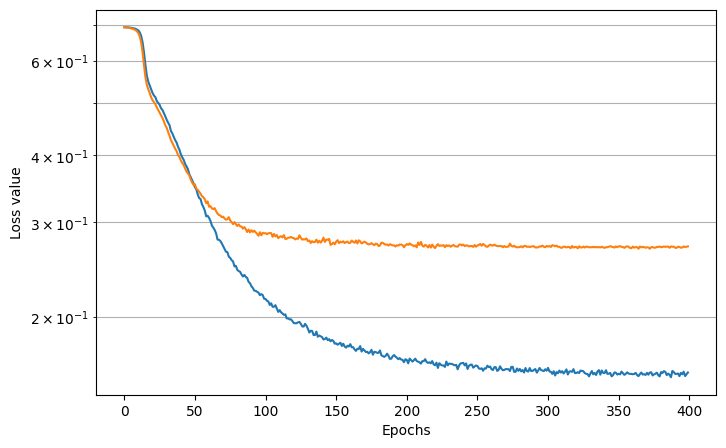

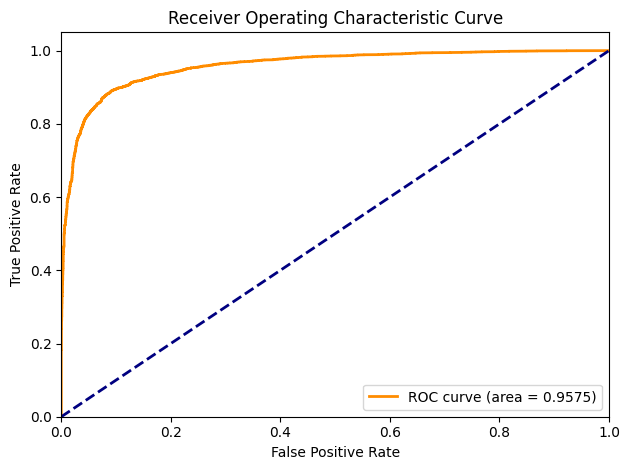

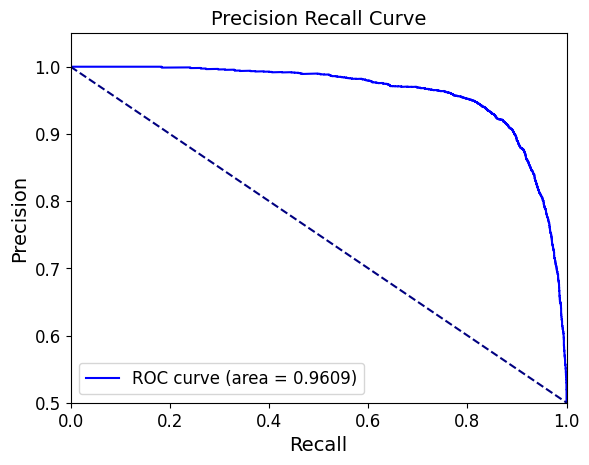

In [6]:
 # plot and save loss, roc, pr picture
plot_losses(train_list, val_list, save_fileFoder)
plot_roc_curve(y_true, y_score, save_fileFoder)
plot_pr_curve(y_true, y_score, save_fileFoder)